## Виконав ФБ-33 Рудий Артем

Завдання другого рівня


## Dataset Information
https://archive.ics.uci.edu/dataset/9/auto+mpg

Дані стосуються споживання пального в міському циклі в милях на галон, яке прогнозується за 3 багатозначними дискретними та 5 неперервними атрибутами.

трішки ясноті до датасту

0. mpg:           continuous
1. cylinders:     multi-valued discrete
2. displacement:  continuous
3. horsepower:    continuous
4. weight:        continuous
5. acceleration:  continuous
6. model year:    multi-valued discrete
7. origin:        multi-valued discrete
8. car name:      string (unique for each instance)


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [13]:
columns = [
    "mpg", "cylinders", "displacement", "horsepower", "weight", 
    "acceleration", "model year", "origin", "car name"
]
auto_mpg_pd = pd.read_csv("auto-mpg.data-original", delim_whitespace=True,  header=None, names=columns)
auto_mpg_pd.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6340\3873249048.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg_pd = pd.read_csv("auto-mpg.data-original", delim_whitespace=True,  header=None, names=columns)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [23]:
print(auto_mpg_pd.isnull().sum())

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [11]:
missing_values = auto_mpg_pd.isnull().sum()
print(missing_values)

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [19]:
types = [
    ("mpg", "float64"),("cylinders", "float64"),("displacement", "float64"),
    ("horsepower", "float64"),("weight", "float64"), ("acceleration", "float64"),
    ("model_year", "float64"),("origin", "float64"), ("car_name", "U50")]

auto_mpg_np = np.array([tuple(row) for row in auto_mpg_pd.to_numpy()], dtype=types)


In [78]:
for column_name in auto_mpg_np.dtype.names:
    print(f"{column_name}: {auto_mpg_np[column_name][:5]}")


mpg: [18. 15. 18. 16. 17.]
cylinders: [8. 8. 8. 8. 8.]
displacement: [307. 350. 318. 304. 302.]
horsepower: [130. 165. 150. 150. 140.]
weight: [3504. 3693. 3436. 3433. 3449.]
acceleration: [12.  11.5 11.  12.  10.5]
model_year: [70. 70. 70. 70. 70.]
origin: [1. 1. 1. 1. 1.]
car_name: ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino']


## Cleaning DF

Поборотися із зниклими даними.

Видалення даних

In [24]:
cleaned_auto_mpg_pd = auto_mpg_pd.dropna(axis = 0)

In [27]:
check_missing_values = cleaned_auto_mpg_pd.isnull().sum()
print(check_missing_values)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [28]:
missing_values = auto_mpg_pd.isnull().sum()
print(missing_values)

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [31]:
cleaned_auto_mpg_pd_2 = auto_mpg_pd
cleaned_auto_mpg_pd_2['mpg'] = cleaned_auto_mpg_pd_2['mpg'].fillna(cleaned_auto_mpg_pd_2['mpg'].mean())
cleaned_auto_mpg_pd_2['horsepower'] = cleaned_auto_mpg_pd_2['horsepower'].fillna(cleaned_auto_mpg_pd_2['horsepower'].mean())


In [32]:
check_missing_values = cleaned_auto_mpg_pd_2.isnull().sum()
print(check_missing_values)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Numpy
аналогічний dropna



In [80]:
cleaned_np = auto_mpg_np[~np.isnan(auto_mpg_np['mpg']) & ~np.isnan(auto_mpg_np['horsepower'])]
cleaned_np.shape

(392,)

In [71]:
mpg_mean = np.nanmean(auto_mpg_np["mpg"])
horsepower_mean = np.nanmean(auto_mpg_np["horsepower"])

auto_mpg_np_copy = auto_mpg_np.copy()

auto_mpg_np_copy["mpg"][np.isnan(auto_mpg_np_copy["mpg"])] = mpg_mean
auto_mpg_np_copy["horsepower"][np.isnan(auto_mpg_np_copy["horsepower"])] = horsepower_mean


## Пронормувати вибраний датасет або стандартизувати його(нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [45]:
def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())

auto_mpg_pd_normalized = normalize_data(cleaned_auto_mpg_pd_2[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']])
auto_mpg_pd_normalized['car name'] = cleaned_auto_mpg_pd_2['car name']
auto_mpg_pd_normalized.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,chevrolet chevelle malibu
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,buick skylark 320
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,plymouth satellite
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,amc rebel sst
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,ford torino


In [93]:
def normalize_data_np(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    
    return (data - min_val) / (max_val - min_val)


normalized_data = normalize_data_np(numeric_data_values)
 
print(normalized_data[:5])

[0.00350195 0.00155642 0.05972763 0.02529183 0.68171206]


## Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

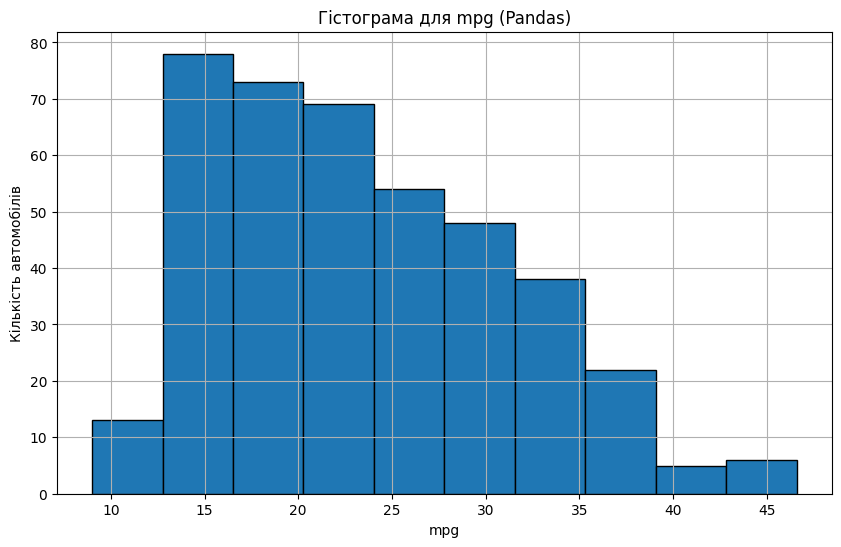

In [108]:
plt.figure(figsize=(10, 6))
auto_mpg_pd["mpg"].hist(bins=10, edgecolor='black')
plt.title('Гістограма для mpg (Pandas)')
plt.xlabel('mpg')
plt.ylabel('Кількість автомобілів')
plt.grid(True)
plt.show()

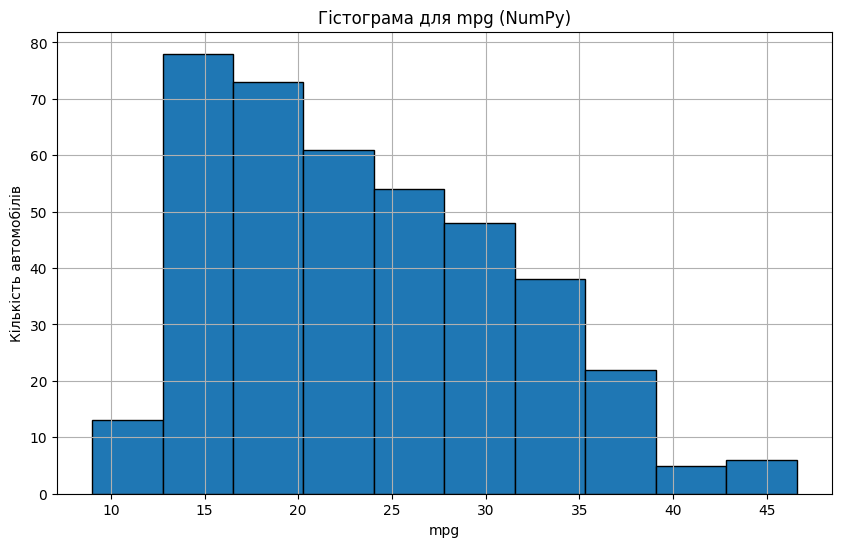

In [107]:
mpg_data = auto_mpg_np["mpg"]
plt.figure(figsize=(10, 6))
plt.hist(mpg_data, bins=10, edgecolor='black')
plt.title('Гістограма для mpg (NumPy)')
plt.xlabel('mpg')
plt.ylabel('Кількість автомобілів')
plt.grid(True)
plt.show()

## Збудувати графік залежності одного integer/real атрибута від іншого.

Побудую графік залежності mpg від weight


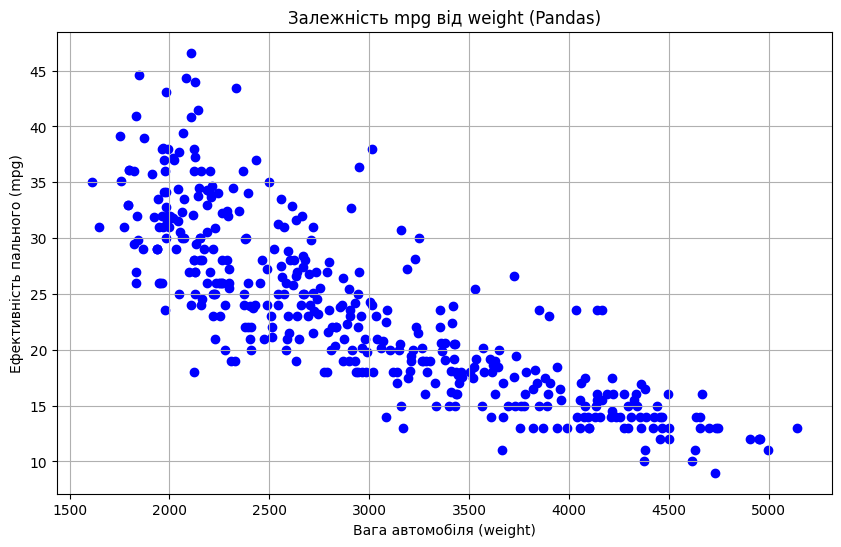

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(auto_mpg_pd["weight"], auto_mpg_pd["mpg"], color='blue')
plt.title('Залежність mpg від weight (Pandas)')
plt.xlabel('Вага автомобіля (weight)')
plt.ylabel('Ефективність пального (mpg)')
plt.grid(True)
plt.show()

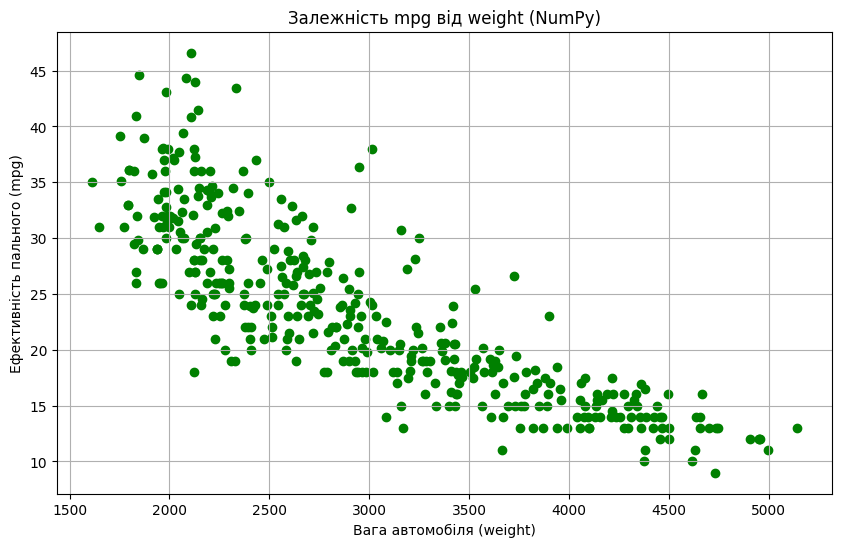

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(auto_mpg_np["weight"], auto_mpg_np["mpg"], color='green')
plt.title('Залежність mpg від weight (NumPy)')
plt.xlabel('Вага автомобіля (weight)')
plt.ylabel('Ефективність пального (mpg)')
plt.grid(True)
plt.show()

## Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [116]:
pearson_corr = auto_mpg_pd["horsepower"].corr(auto_mpg_pd["weight"], method='pearson')
spearman_corr = auto_mpg_pd["horsepower"].corr(auto_mpg_pd["weight"], method='spearman')

print(f"Коефіцієнт кореляції Пірсона: {pearson_corr}")
print(f"Коефіцієнт кореляції Спірмена: {spearman_corr}")

Коефіцієнт кореляції Пірсона: 0.8626166884534616
Коефіцієнт кореляції Спірмена: 0.8698380836929318


In [120]:
pearson_corr_np = np.corrcoef(cleaned_np['horsepower'], cleaned_np['weight'])[0, 1]
spearman_corr_np = np.corrcoef(np.argsort(cleaned_np['horsepower']), np.argsort(cleaned_np['weight']))[0, 1]

print(f"Коефіцієнт кореляції Пірсона (NumPy): {pearson_corr_np}")
print(f"Коефіцієнт кореляції Спірмена (NumPy): {spearman_corr_np}")

Коефіцієнт кореляції Пірсона (NumPy): 0.8645377375741443
Коефіцієнт кореляції Спірмена (NumPy): 0.13131073869972815


## One-Hot Encoding

In [143]:
encoder = OneHotEncoder(sparse_output=False)
origin_data = auto_mpg_pd[['origin']]  

one_hot_encoded = encoder.fit_transform(origin_data)

one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['origin']))

auto_mpg_pd = pd.concat([auto_mpg_pd, one_hot_encoded_df], axis=1)


In [144]:
auto_mpg_pd.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,origin_1.0,...,car name_vw rabbit custom,origin_1.0,origin_2.0,origin_3.0,origin_1.0,origin_2.0,origin_3.0,origin_1.0,origin_2.0,origin_3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

## 1-D
Наведені нище графіки дають гарне уявлення про розподіл основних даних будь-якого з атрибутів.

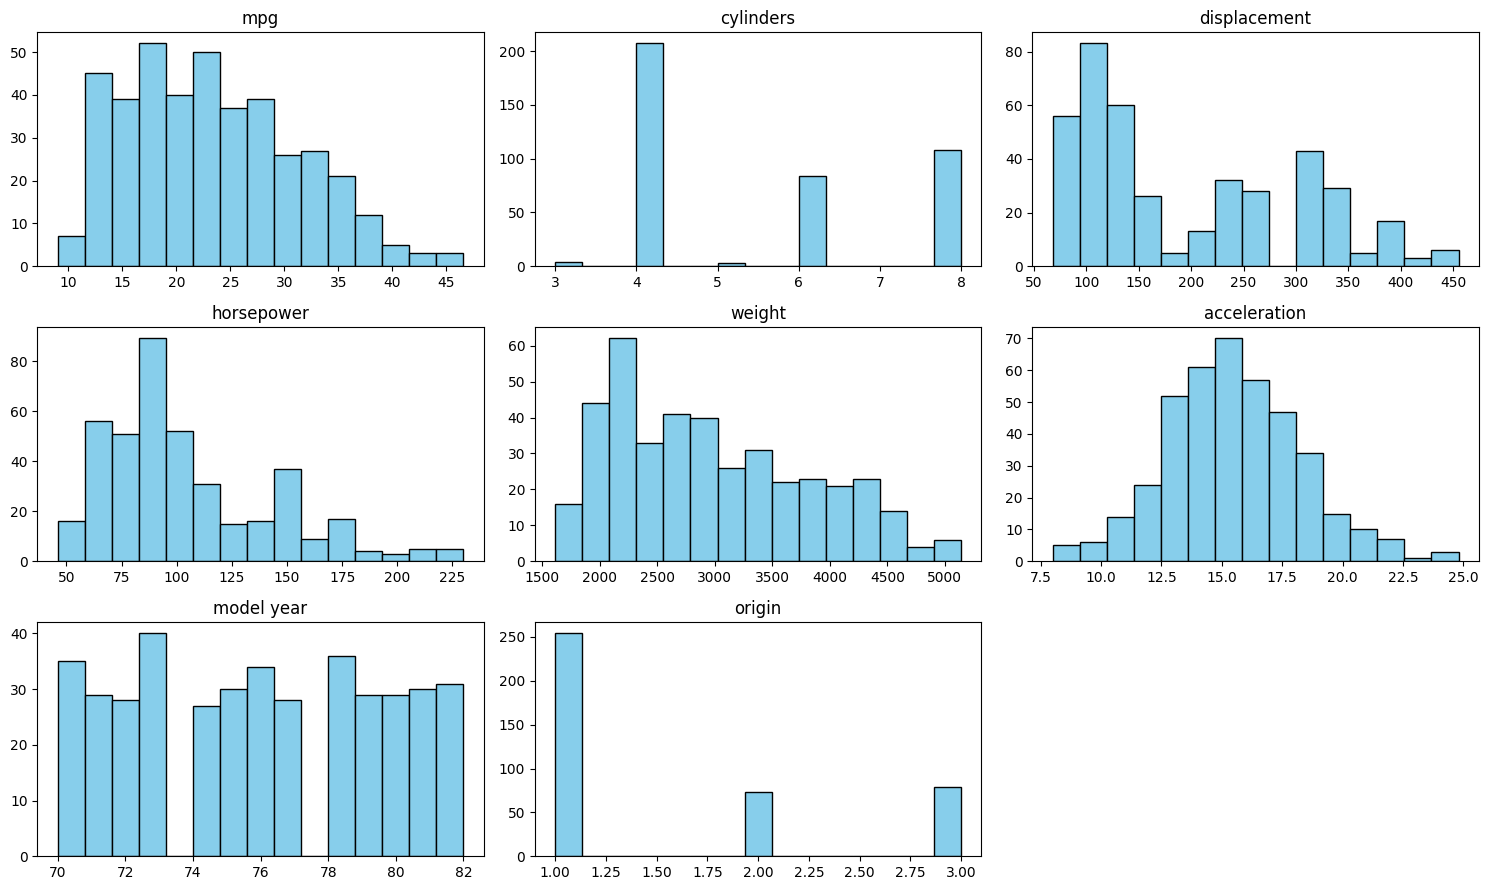

In [151]:
cleaned_auto_mpg_pd_2.hist(bins=15, color='skyblue', edgecolor='black', linewidth=1.0, grid=False, figsize=(10, 6))
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
plt.show()


## Візуалізація даних у двох вимірах (2-D)

Один із найкращих способів перевірити потенційні зв’язки чи кореляції між різними атрибутами даних – це використати попарну кореляційну матрицю та зобразити її як теплову карту

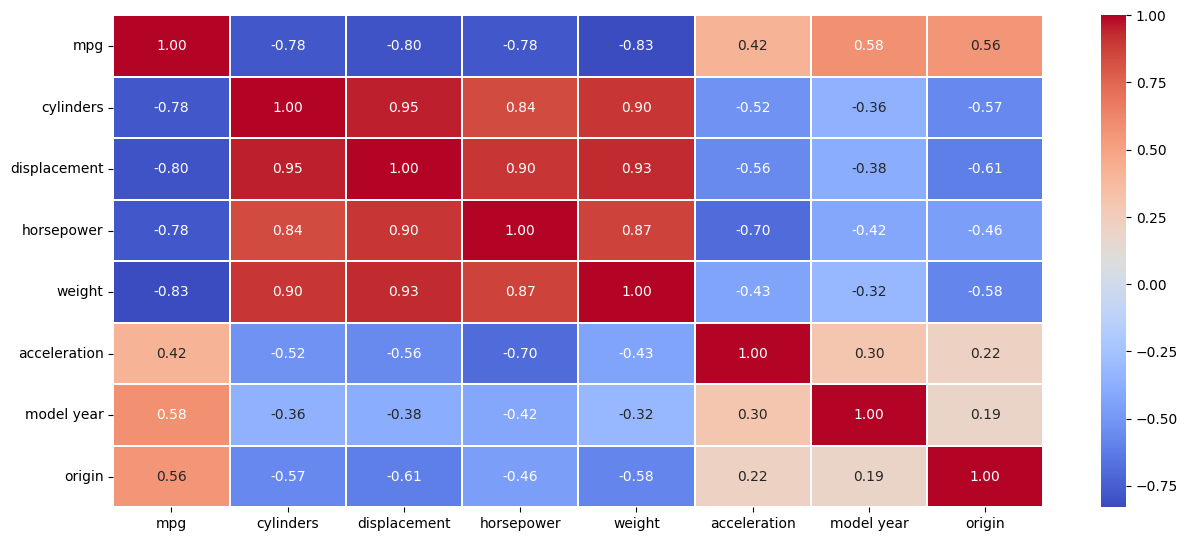

In [155]:
numeric_columns = auto_mpg_pd.select_dtypes(include=['number']).columns
numeric_data_frame = auto_mpg_pd[numeric_columns]
corr = numeric_data_frame.corr()
f, ax = plt.subplots(figsize=(15, 6))
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
plt.show()

## Візуалізація даних у трьох вимірах (3-D)

Розглядаючи три атрибути або виміри в даних, ми можемо візуалізувати їх, розглянувши попарну діаграму розсіювання та ввівши поняття кольору або відтінку, щоб відокремити значення в категоріальному вимірі.


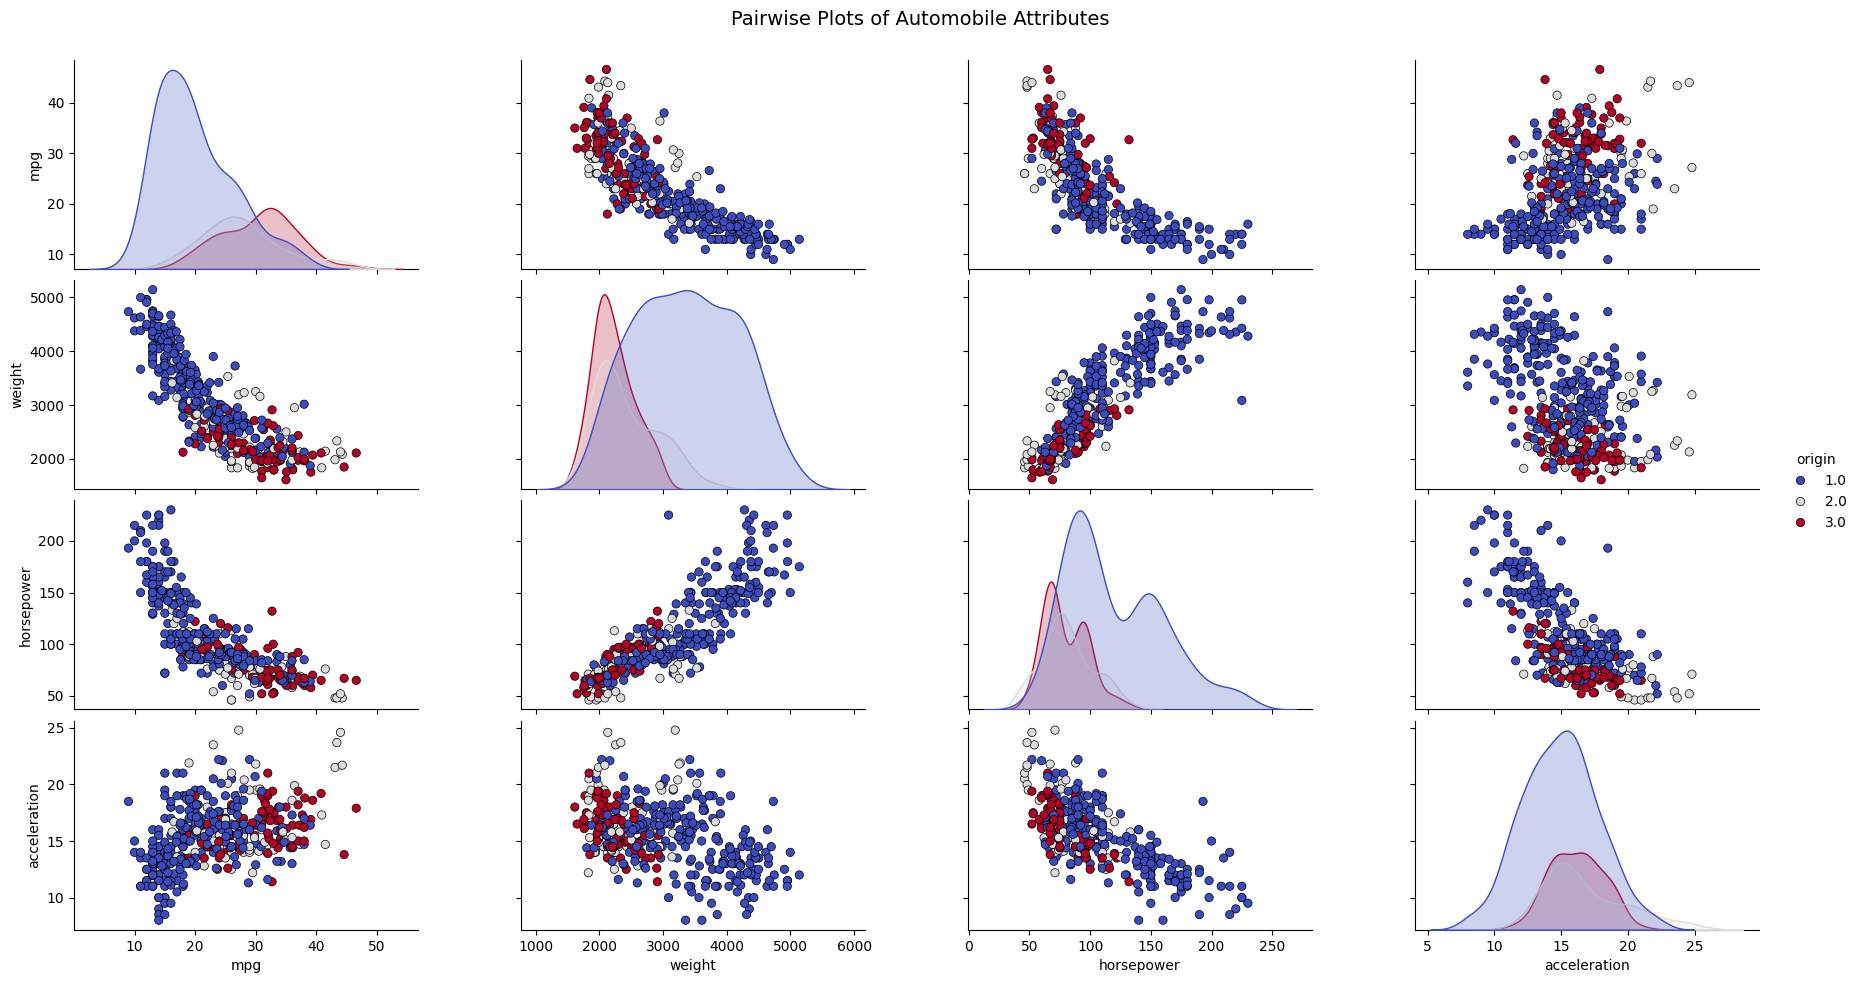

In [154]:
cols = ['mpg', 'weight', 'horsepower', 'acceleration', 'origin']

pp = sns.pairplot(auto_mpg_pd[cols], hue='origin', height=2.5, aspect=1.8,
                  palette="coolwarm", plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots of Automobile Attributes', fontsize=14)

plt.show()